Qauntify gas-liquid two-phase flow pattern prediction with several ML algorithms

In [6]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Load libraries
import pandas
import numpy
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier        
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

readdata = pandas.read_csv('BDOShohamIML.csv')
dataset = pandas.DataFrame(readdata, columns=['Vsl', 'Vsg', 'VisL', 'VisG', 'DenL', 'DenG', 'ST', 'Ang', 'ID', 'Flow Pattern'])

# Summarize the Dataset

# shape
print(dataset.shape)

# head
print(dataset.head(20))

# Statistical Summary

# descriptions
print(dataset.describe())

(5675, 10)
    Vsl    Vsg   VisL     VisG  DenL  DenG    ST  Ang     ID Flow Pattern
0   6.3  0.025  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
1   4.0  0.040  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
2   6.3  0.040  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
3   4.0  0.063  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
4   6.3  0.063  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
5   4.0  0.100  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
6   6.3  0.100  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
7   4.0  0.160  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
8   6.3  0.160  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
9   4.0  0.400  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
10  6.3  0.400  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
11  4.0  0.630  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
12  6.3  0.630  0.001  0.00

In [7]:
# Class Distribution
#[Shoham 2006] attempted to summarize the main flow patterns.

#Annular (A), Bubble (B), Dispersed bubble
#(DB), Intermittent (I), Stratified smooth (SS) and Stratified wavy (SW). The Intermittent flow
#pattern considers Slug (SL) and Churn (CH) flow pattern combined

# class distribution
print(dataset.groupby('Flow Pattern').size())

Flow Pattern
A     1033
B      125
DB     594
I     2905
SS     140
SW     878
dtype: int64


In [8]:
# Evaluate Some Algorithms

# Now it is time to create some models of the data and estimate their accuracy on unseen data.

# Here is what we are going to cover in this step:

# Separate out a validation dataset.
# Set-up the test harness to use 10-fold cross validation.
# Build 5 different models to predict species from flower measurements
# Select the best model.

# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

# We will use 10-fold cross validation to estimate accuracy.

# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

# Build Models

# We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

# Let’s evaluate 4 different algorithms:

# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Decision Tree (DT)
# Random Forest (RF)
# Support Vector Machines (SVM).
# Neural Network

# This is a good mixture of simple linear (LR and LDA), nonlinear (KNN and SVM) algorithms.


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.667401 (0.022311)
LDA: 0.599119 (0.025800)
KNN: 0.852863 (0.019273)
DT: 0.920925 (0.009420)
RF: 0.932819 (0.010436)
SVM: 0.803084 (0.019030)
MLP: 0.669604 (0.036072)


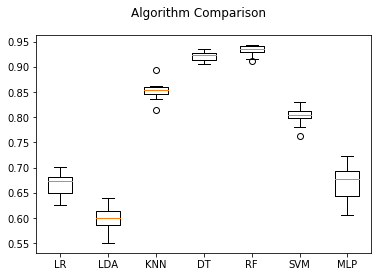

In [10]:
# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Make Predictions
Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

 We can run the RF model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

 Make predictions on validation dataset

In [12]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9488986784140969
[[199   0   0   6   0  12]
 [  0  21   0   0   0   0]
 [  0   2 111   3   0   0]
 [  1   0  15 551   0   3]
 [  0   0   0   0  27   0]
 [  5   0   2   5   4 168]]
              precision    recall  f1-score   support

           A       0.97      0.92      0.94       217
           B       0.91      1.00      0.95        21
          DB       0.87      0.96      0.91       116
           I       0.98      0.97      0.97       570
          SS       0.87      1.00      0.93        27
          SW       0.92      0.91      0.92       184

   micro avg       0.95      0.95      0.95      1135
   macro avg       0.92      0.96      0.94      1135
weighted avg       0.95      0.95      0.95      1135



We can see that the accuracy is 0.93 or 93%. The confusion matrix provides an indication of the six errors made.
Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.